# Glass Detection

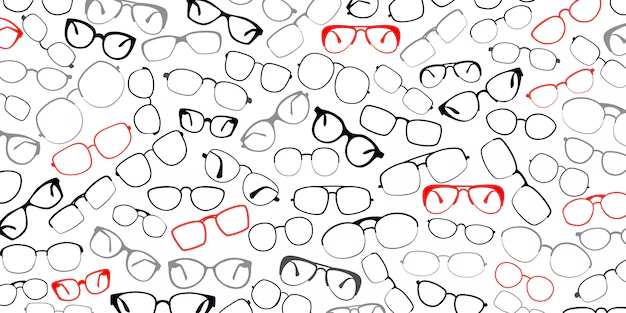
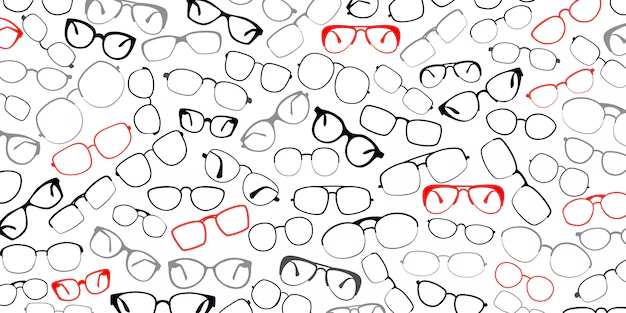

## Introduction

Glass detection from images is a crucial task in many real-world applications, including manufacturing quality control, recycling, and environmental monitoring. The process involves identifying glass objects in various settings, such as urban environments, industrial sites, and waste sorting facilities. With the advancements in computer vision and deep learning techniques, it is now possible to automate this process efficiently, saving time and reducing human error.

In this project, we use a convolutional neural network (CNN) to classify images into two categories: 'Glass' and 'No Glass'. The model is trained on a dataset containing images of different objects, with the goal of accurately detecting the presence of glass in each image.

## Requirements

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
import pandas as pd
import os 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
import math
from tensorflow.keras.models import load_model

## Import Data

In [6]:
df=pd.read_csv("/kaggle/input/applications-of-deep-learning-wustl-fall-2023/train.csv")

In [7]:
df.head()

,id,file,glasses
0,1,1.jpg,0
1,2,2.jpg,0
2,3,3.jpg,1
3,4,4.jpg,0
4,5,5.jpg,1


In [8]:
df['file']="/kaggle/input/applications-of-deep-learning-wustl-fall-2023/"+df['file']

In [9]:
df.head()

,id,file,glasses
0,1,/kaggle/input/applications-of-deep-learning-wu...,0
1,2,/kaggle/input/applications-of-deep-learning-wu...,0
2,3,/kaggle/input/applications-of-deep-learning-wu...,1
3,4,/kaggle/input/applications-of-deep-learning-wu...,0
4,5,/kaggle/input/applications-of-deep-learning-wu...,1


In [14]:
df.shape

(24999, 3)

In [10]:
df['glasses'].value_counts()

glasses
1    12539
0    12460
Name: count, dtype: int64

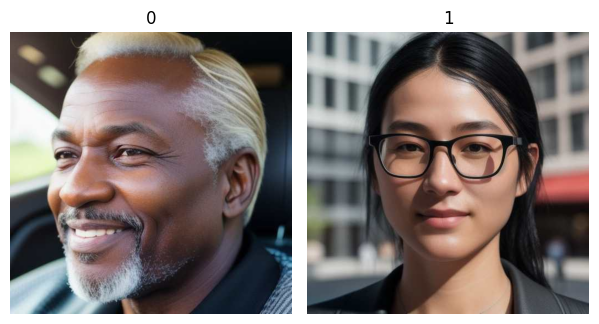

In [13]:
plt.figure(figsize=(15, 5))
labels=[0,1]
for i, label in enumerate(labels):
    sample_img_path = df[df['glasses'] == label].iloc[0]['file'] 
    img = cv2.imread(sample_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)

plt.tight_layout()
plt.show()

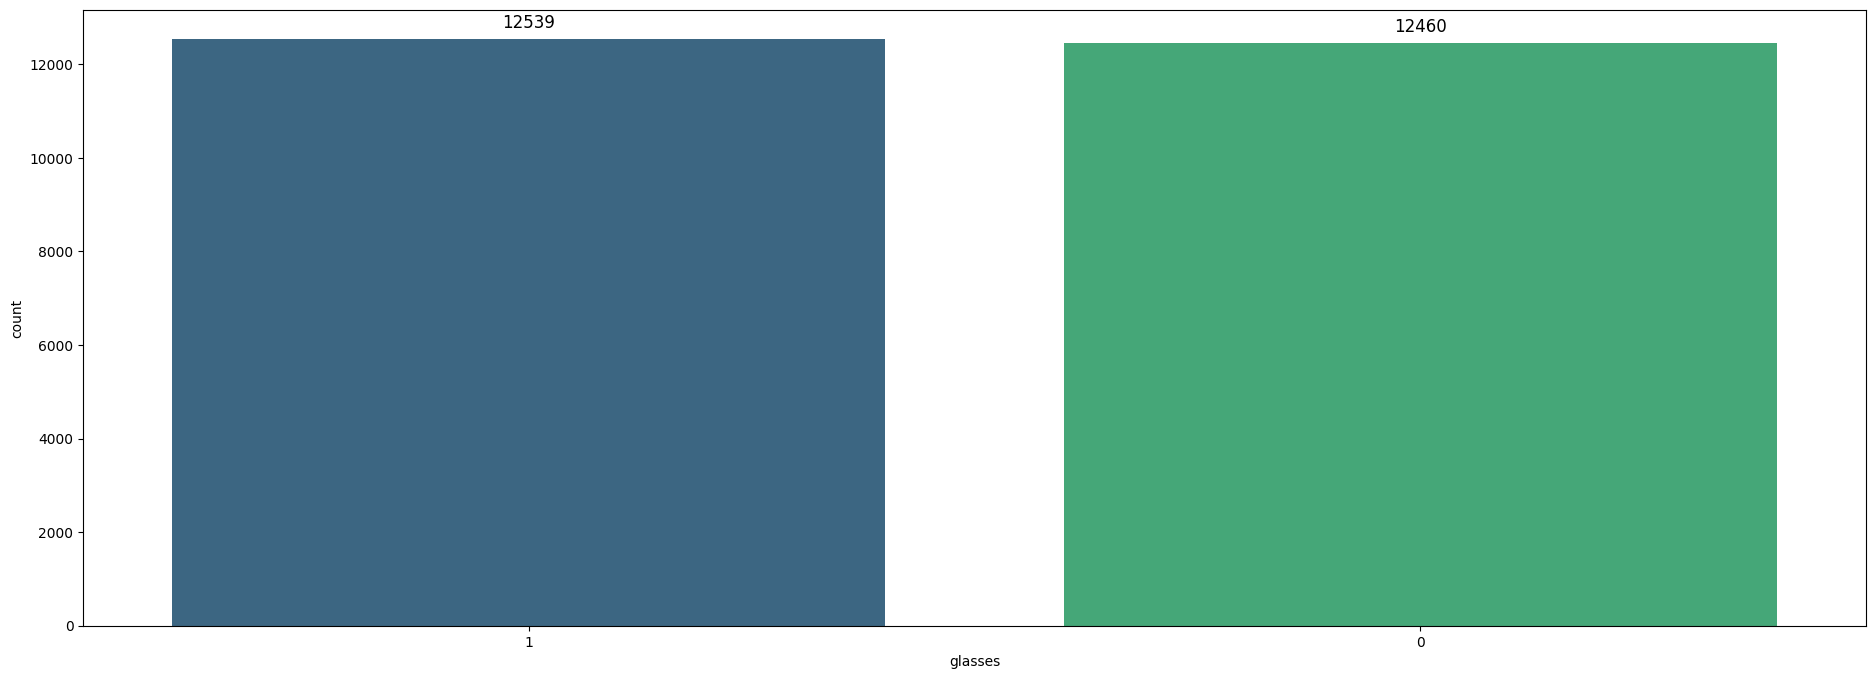

In [15]:
plt.figure(figsize=(23,8))
ax=sns.countplot(x=df["glasses"],palette="viridis",order=df['glasses'].value_counts().index)
for p in ax.containers:
    ax.bar_label(p, fontsize=12, color='black', padding=5);

## Preprocess Images

In [18]:
x=[]
for img in df["file"]:
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(64,64))
    img=img/255.0
    x.append(img)

In [19]:
x=np.array(x)

In [20]:
y=df[["glasses"]]

In [21]:
x.shape,y.shape

((24999, 64, 64, 3), (24999, 1))

## Modelling

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [57]:
model=Sequential()
model.add(Input(shape=(64,64,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=36,verbose=1)

Epoch 1/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8069 - loss: 0.5562 - val_accuracy: 0.7052 - val_loss: 1.7873
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9806 - loss: 0.0563 - val_accuracy: 0.9192 - val_loss: 0.1767
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9853 - loss: 0.0447 - val_accuracy: 0.9882 - val_loss: 0.0298
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9889 - loss: 0.0333 - val_accuracy: 0.9928 - val_loss: 0.0240
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9899 - loss: 0.0276 - val_accuracy: 0.9772 - val_loss: 0.0857
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9919 - loss: 0.0231 - val_accuracy: 0.9882 - val_loss: 0.0458
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9903 - loss: 0.0279 - val_accuracy: 0.9854 - val_loss: 0.0522
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.9871 - loss: 0.0435 - 

In [59]:
model.save('cnn_model.h5')

## Model Analysis

In [77]:
predictions=model.predict(x_test)
predictions=predictions.argmax(axis=-1)
predictions=np.array(predictions)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [78]:
accuracy_score(predictions,y_test)

0.9876

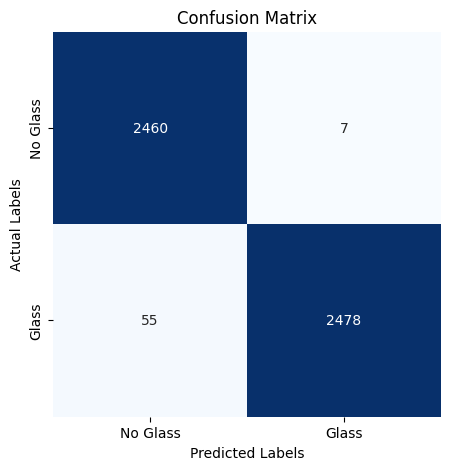

In [62]:
cm = confusion_matrix(y_test, predictions)  
label_encoding_dict = {'No Glass':0,'Glass':1}

plt.figure(figsize=(5, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    cmap='Blues',
    xticklabels=label_encoding_dict.keys(),
    yticklabels=label_encoding_dict.keys(),
    cbar=False
)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix');

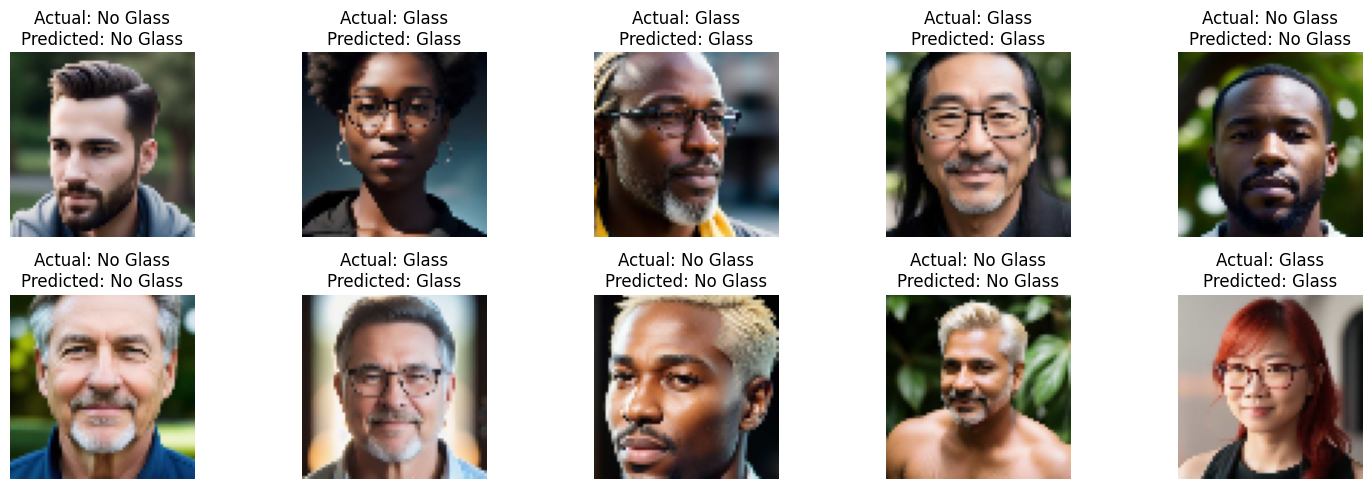

In [63]:
label_decoding_dict = {0: 'No Glass', 1: 'Glass'}

y_test = np.array(y_test)

y_test_names = [label_decoding_dict[label.item()] for label in y_test]
predictions_names = [label_decoding_dict[label.item()] for label in predictions]

plt.figure(figsize=(15, 5))

num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx])  
    plt.axis('off')
    plt.title(f"Actual: {y_test_names[idx]}\nPredicted: {predictions_names[idx]}")

plt.tight_layout()
plt.show()


In [64]:
history.history['accuracy'][-1]

0.998249888420105

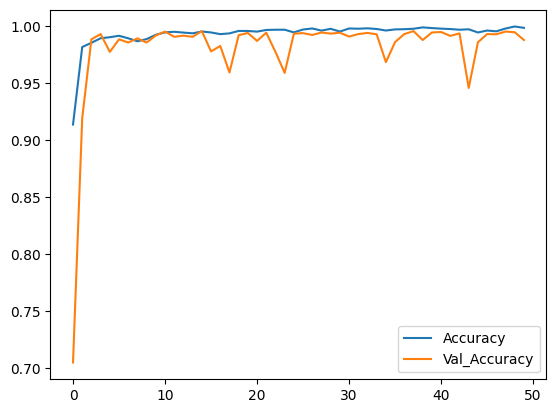

In [65]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

## Testing the Model

In [66]:
df_test=pd.read_csv('/kaggle/input/applications-of-deep-learning-wustl-fall-2023/test.csv')

In [67]:
df_test.head()

,id,file
0,25000,25000.jpg
1,25001,25001.jpg
2,25002,25002.jpg
3,25003,25003.jpg
4,25004,25004.jpg


In [68]:
df_test['file']="/kaggle/input/applications-of-deep-learning-wustl-fall-2023/"+df_test['file']

In [69]:
x_test=[]
for img in df_test["file"]:
    img=cv2.imread(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(64,64))
    img=img/255.0
    x_test.append(img)

In [70]:
x_test=np.array(x_test)

In [71]:
predictions=model.predict(x_test)
predictions=predictions.argmax(axis=-1)
predictions=np.array(predictions)

215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [72]:
submission=pd.DataFrame({
    'id':df_test['id'],
    'glasses':predictions
})

In [73]:
submission.to_csv('submission.csv',index=False)

## Conclusion

The model achieved an impressive accuracy of **99.82%**, demonstrating its ability to effectively detect glass in images. This high accuracy indicates that the model performs well in distinguishing between images containing glass and those that do not. 